# Exploratory Analysis on Bank Transaction Data

Here we perform exploratory analysis on a transaction data of 100 customers synthesized by ANZ Bank available on theforage.com. The analysis uses numpy and pandas for data manipulation, and matplotlib, seaborn and plotly for data visualisation. The aim of the task is to extract insights on the average volume and spending segmented by transaction, by customer or by time. 

## Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.graph_objects as go

## Import and clean dataset

In [2]:
# Import dataset
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
# View dataset
data.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

In [4]:
# Check that no transaction is duplicated
print(data.duplicated().sum())

0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
data.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

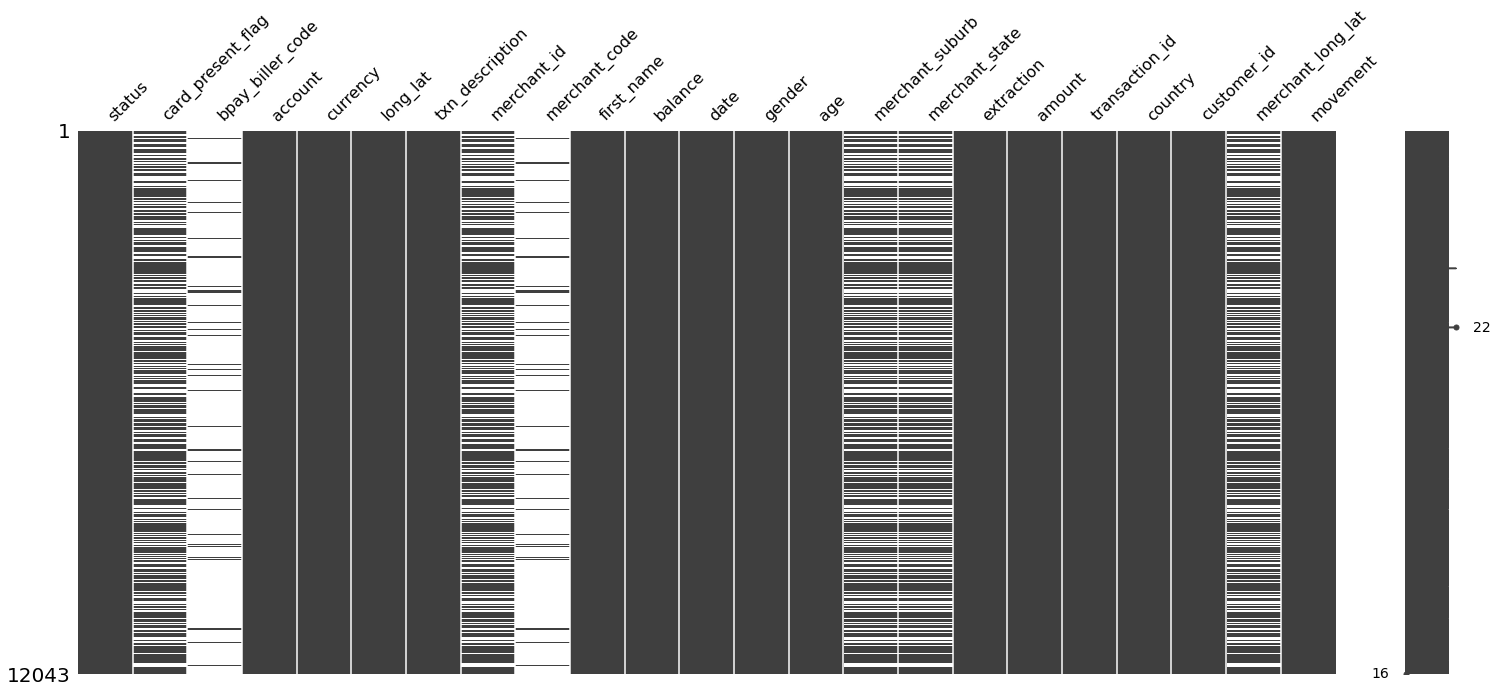

In [7]:
# Visualise missing data
missingno.matrix(data)
plt.show()

There are 23 features and 12043 entries in the dataset. 

Almost all of the bpay_biller_code and merchant_code columns are missing. These columns will be removed.

More than 1/3 of card_present_flag, merchant_id, merchant_suburb, merchant_state and merchant_long_lat columns contain missing values for the same transactions. We will keep these data for now.

In [8]:
# Remove bpay_biller_code and merchant_code columns
data = data.drop(columns = ['bpay_biller_code', 'merchant_code'], axis=1)

In [9]:
# Count number of unique values in categorical columns
nunique_values = {}
for column in data.columns:
   if data[column].dtype == 'O':
    nunique_values[column] = data[column].nunique()

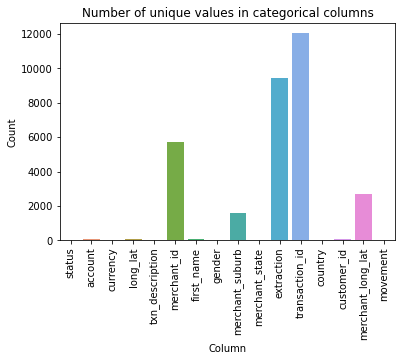

In [10]:
# Visualise number of unique values in categorical columns
nunique_values_series = pd.Series(nunique_values)
sns.barplot(x = nunique_values_series.index, y =nunique_values_series)
plt.title('Number of unique values in categorical columns')
plt.xlabel('Column')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Display number of unique values in categorical columns
nunique_values_series

status                   2
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
first_name              80
gender                   2
merchant_suburb       1609
merchant_state           8
extraction            9442
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

Different customers may or may not share the same first name. The first_name column is not very insightful and it is sufficient to use the customer_id to identify each customer. We will remove the first_name column.

In [12]:
# Remove first_name column
data = data.drop(columns = ['first_name'], axis=1)

In [13]:
# View unique values in currency column
data.currency.unique()

array(['AUD'], dtype=object)

In [14]:
# View unique values in country column
data.country.unique()

array(['Australia'], dtype=object)

There is only one value "AUD" in the currency column and only one value "Australian" in the country column. We will remove the currency and country columns.

In [15]:
# Remove country and currency columns
data = data.drop(columns = ['country', 'currency'], axis=1)

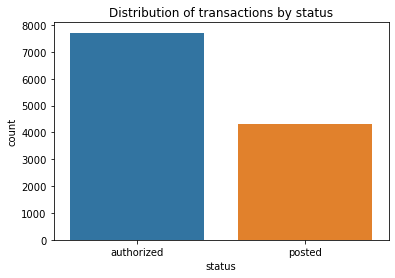

In [16]:
# Visualise distribution of transactions by status
sns.countplot(data = data, x = 'status')
plt.title('Distribution of transactions by status')
plt.show()

The number of authorized transactions were about twice as many as posted transactions.

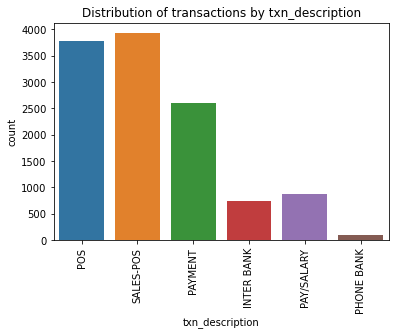

In [17]:
# Visualise distribution of transactions by txn_description
sns.countplot(data = data, x = 'txn_description')
plt.title('Distribution of transactions by txn_description')
plt.xticks(rotation=90)
plt.show()

There were significantly more transactions assocated with POS, SALES-POS or PAYMENT than INTERBANK, PAY/SALARY or PHONE BANK.

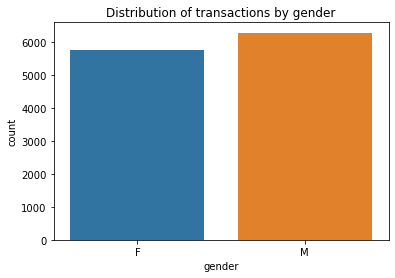

In [18]:
# Visualise distribution of transactions by gender
sns.countplot(data = data, x = 'gender')
plt.title('Distribution of transactions by gender')
plt.show() 

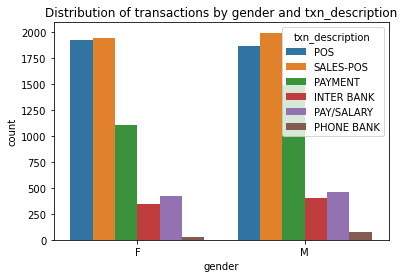

In [19]:
# Visualise distribution of transactions by gender and txn_description
sns.countplot(data = data, x = 'gender', hue = 'txn_description')
plt.title('Distribution of transactions by gender and txn_description')
plt.show() 

There were slightly more transactions associated with male. The distributions of types of transactions are similar for both genders.

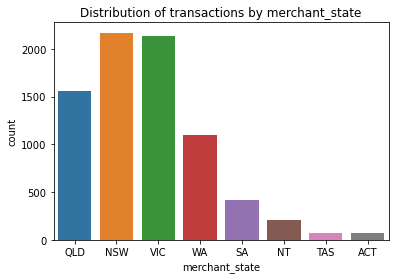

In [20]:
# Visualise distribution of transactions by merchant_state
sns.countplot(data = data, x = 'merchant_state')
plt.title('Distribution of transactions by merchant_state')
plt.show() 

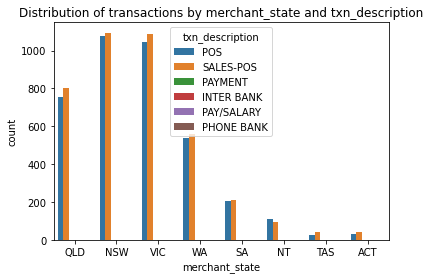

In [21]:
# Visualise distribution of transactions by merchant_state and txn_description
sns.countplot(data = data, x = 'merchant_state', hue = 'txn_description')
plt.title('Distribution of transactions by merchant_state and txn_description')
plt.show() 

There were more transactions in NSW and VIC than other states. Transactions in all states are domincated by POS and SALES-POS.

In [22]:
# Get the names of non-object columns
for column in data.columns:
    if data[column].dtype != 'O':
        print(column)

card_present_flag
balance
date
age
amount


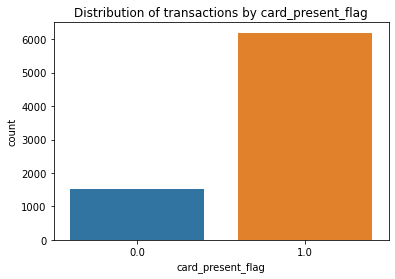

In [23]:
# Visualise distribution of transactions by card_present_flag
sns.countplot(data = data, x = 'card_present_flag')
plt.title('Distribution of transactions by card_present_flag')
plt.show() 

Without considering the nan values, there are a lot more transactions associated with card_present_flag. The 4326 nan values in card_present_flag column are likely to associate with the absence of card present flag.

In [24]:
# Assign zero value to nan values in card_present_flag column
data.fillna(value={"card_present_flag": 0}, inplace = True)

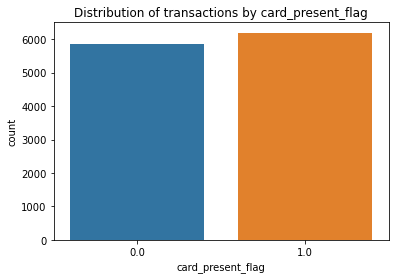

In [25]:
# Visualise distribution of transactions by card_present_flag after replacing nan by zero values
sns.countplot(data = data, x = 'card_present_flag')
plt.title('Distribution of transactions by card_present_flag')
plt.show() 

Assuming the nan values indicate absence of card, there were only slightly more transactions associated with card present flag.

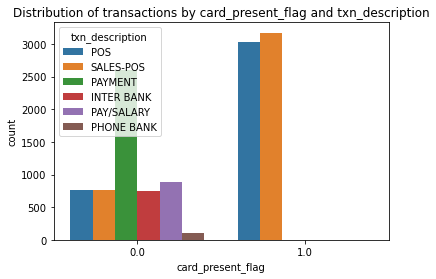

In [26]:
# Visualise distribution of transactions by card_present_flag and txn_description after replacing nan by zero values
sns.countplot(data = data, x = 'card_present_flag', hue = 'txn_description')
plt.title('Distribution of transactions by card_present_flag and txn_description')
plt.show() 

Most of the POS and SALES-POS transactions are associated with card present flag. All of PAYMENT, INTER BANK, PAY/SALARY and PHONE BANK do not associate with card present flag.

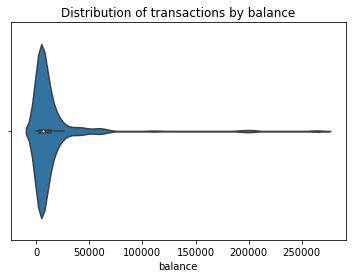

In [27]:
# Visualise distribution of transactions by balance 
sns.violinplot(data = data, x = 'balance')
plt.title('Distribution of transactions by balance')
plt.show() 

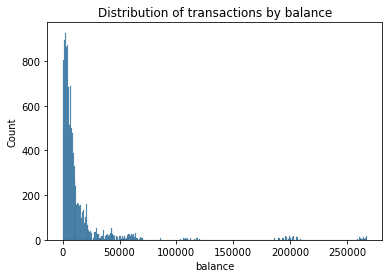

In [28]:
# Visualise distribution of transactions by balance 
sns.histplot(data = data, x = 'balance')
plt.title('Distribution of transactions by balance')
plt.show() 

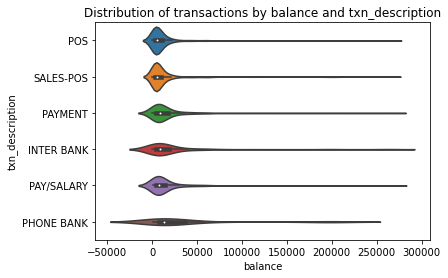

In [29]:
# Visualise distribution of transactions by balance and txn_description
sns.violinplot(data = data, x = 'balance', y ='txn_description')
plt.title('Distribution of transactions by balance and txn_description')
plt.show() 

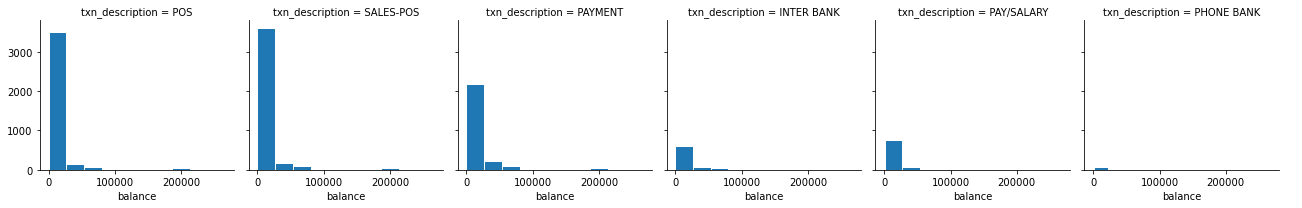

In [30]:
# Visualise distribution of transactions by balance and txn_description
g = sns.FacetGrid(data, col='txn_description')
g.map(plt.hist, 'balance', edgecolor='w').add_legend()
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(3))
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
plt.show()

Most of the transcations were associated with a balance below 10000 AUD. There were some outliers between 100000 and 300000 AUD in the POS, SALES-POS and PAYMENT categories. 

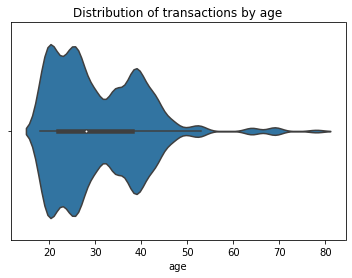

In [31]:
# Visualise distribution of transactions by age
sns.violinplot(data = data, x = 'age')
plt.title('Distribution of transactions by age')
plt.show() 

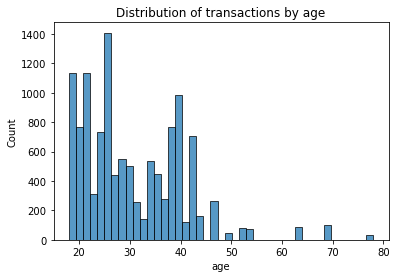

In [32]:
# Visualise distribution of transactions by age
sns.histplot(data = data, x = 'age')
plt.title('Distribution of transactions by age')
plt.show() 

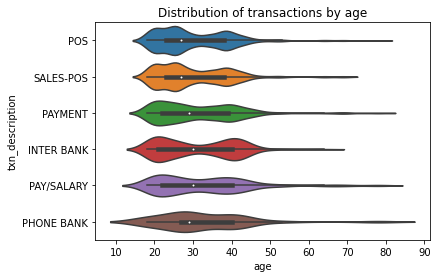

In [33]:
# Visualise distribution of transactions by age
sns.violinplot(data = data, x = 'age', y ='txn_description')
plt.title('Distribution of transactions by age')
plt.show() 

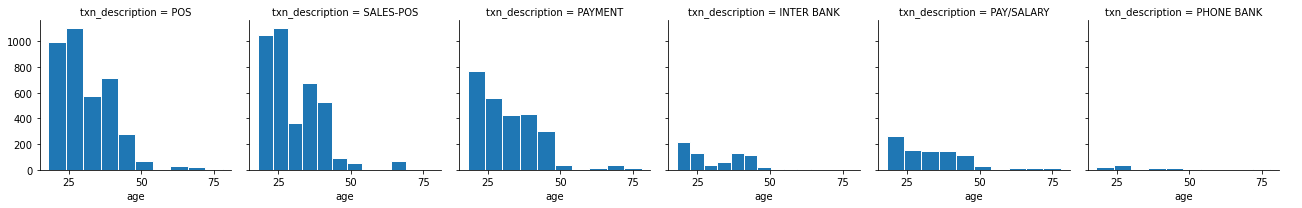

In [34]:
# Visualise distribution of transactions by age and txn_description
g = sns.FacetGrid(data, col='txn_description')
g.map(plt.hist, 'age', edgecolor='w').add_legend()
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(3))
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
plt.show()

Highest number of transactions are associated those betwen 20-30, followed by those around 40 years old. Transactions in POS and SALE-POS are dominated by customers aged 30 or below.

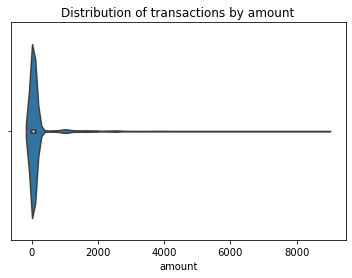

In [35]:
# Visualise distribution of transactions by amount
sns.violinplot(data = data, x = 'amount')
plt.title('Distribution of transactions by amount')
plt.show() 

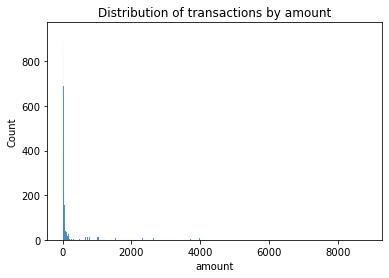

In [36]:
# Visualise distribution of transactions by amount
sns.histplot(data = data, x = 'amount')
plt.title('Distribution of transactions by amount')
plt.show() 

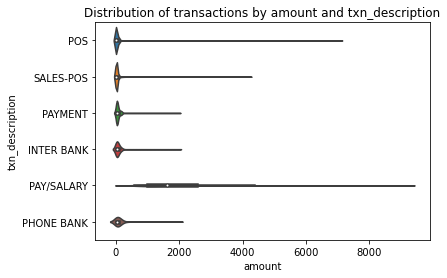

In [37]:
# Visualise distribution of transactions by amount and txn_description
sns.violinplot(data = data, x = 'amount', y ='txn_description')
plt.title('Distribution of transactions by amount and txn_description')
plt.show() 

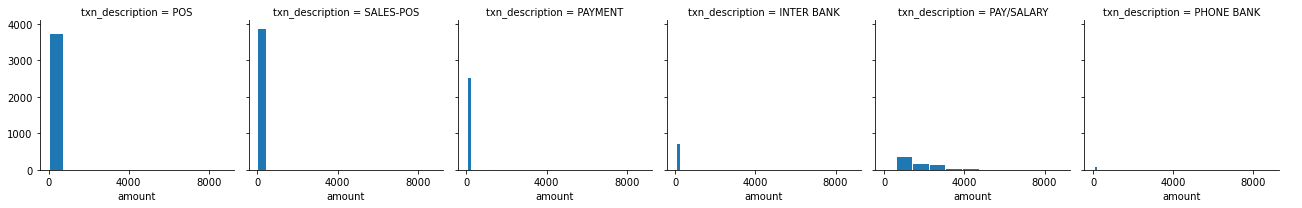

In [38]:
# Visualise distribution of transactions by amount and txn_description
g = sns.FacetGrid(data, col='txn_description')
g.map(plt.hist, 'amount', edgecolor='w').add_legend()
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(3))
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
plt.show()

Most of the transactions are below 500 AUD. PAY/SALARY transactions are associated with higher amount between 1000-3000 AUD.

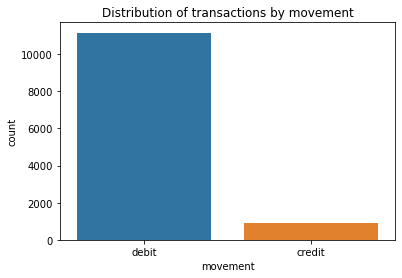

In [39]:
# Visualise distribution of transactions by movement
sns.countplot(data = data, x = 'movement')
plt.title('Distribution of transactions by movement')
plt.show() 

A significantly higher number of transactions are associated with debit instead of credit.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  extraction         12043 non-null  object        
 13  amount             12043 non-null  float64       
 14  transa

## Segment transactions by time

### Number of transactions over time

In [41]:
np.min(data['date'])

Timestamp('2018-08-01 00:00:00')

In [42]:
np.max(data['date'])

Timestamp('2018-10-31 00:00:00')

The dates of transactions in the dataset were between 1 Aug and 31 October 2018.

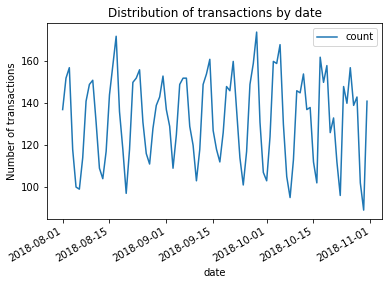

In [145]:
# Visualise number of transactions over time
data.groupby(['date']).transaction_id.agg(['count']).plot()
plt.title('Distribution of transactions by date')
plt.ylabel('Number of transactions')
plt.show()

There seem to be some seasonality in the number of transactions.

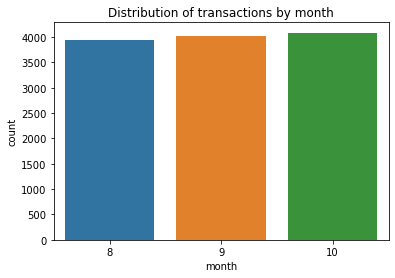

In [43]:
# Visualise distribution of transactions by month
data['month'] = data['date'].apply(lambda x: x.month)
sns.countplot(data = data, x = 'month')
plt.title('Distribution of transactions by month')
plt.show()

There were similar number of transactions in August, September and October 2018.

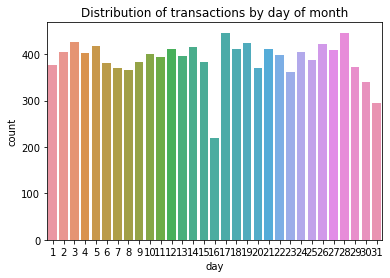

In [44]:
# Visualise distribution of transactions by day of month
data['day'] = data['date'].apply(lambda x: x.day)
sns.countplot(data = data, x = 'day')
plt.title('Distribution of transactions by day of month')
plt.show()

There are significantly fewer transactions on the 16th.

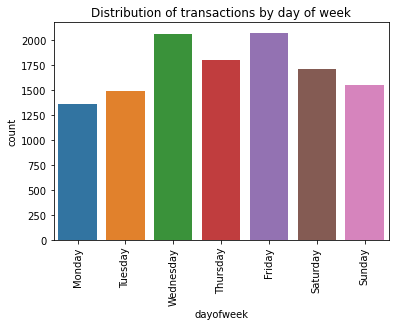

In [45]:
# Visualise distribution of transactions by day of week
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
sns.countplot(data = data, x = 'dayofweek')
plt.title('Distribution of transactions by day of week')
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=90)
plt.show()

There are more transactions on Wednesday and Friday than other days of week.

### Amount of transactions over time

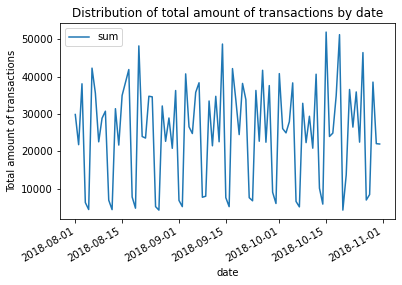

In [146]:
# Visualise amount of transactions over time
data.groupby(['date']).amount.agg(['sum']).plot()
plt.title('Distribution of total amount of transactions by date')
plt.ylabel('Total amount of transactions')
plt.show()

There appears some seasonality in the total amount of transactions.

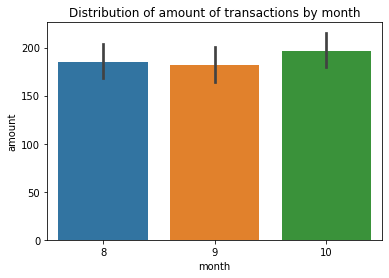

In [46]:
# Visualise distribution of amount of transactions by month
sns.barplot(data = data, x = 'month', y='amount')
plt.title('Distribution of amount of transactions by month')
plt.show()

There was a small increase in amount of transactions in October compared to August and September.

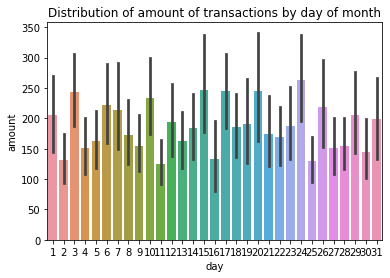

In [47]:
# Visualise distribution of amount of transactions by day of month
sns.barplot(data = data, x = 'day', y='amount')
plt.title('Distribution of amount of transactions by day of month')
plt.show()

The amount of transactions were lower on 2nd, 11th, 16th and 25th.

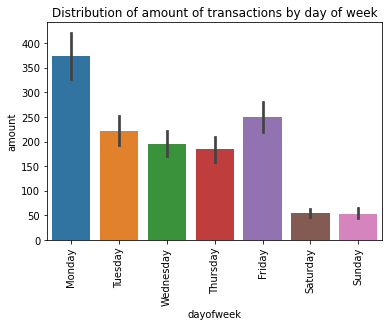

In [48]:
# Visualise distribution of amount of transactions by day of week
sns.barplot(data = data, x = 'dayofweek', y='amount')
plt.title('Distribution of amount of transactions by day of week')
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=90)
plt.show()

The amount of the transactions on Monday was highest, whereas those on Saturday and Sunday were lowest.

## Segment transactions by customer

### Number of transactions per customer

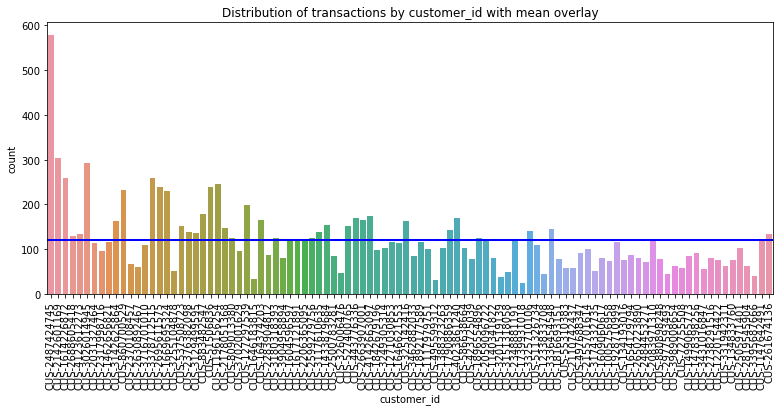

In [49]:
# Visualise distribution of transactions by customer_id with mean overlay
plt.figure(figsize=(13,5))
sns.countplot(data = data, x = 'customer_id')
plt.title('Distribution of transactions by customer_id with mean overlay')
plt.axhline(y=np.mean(data.groupby('customer_id').transaction_id.count()), color='b', linewidth=2)
plt.xticks(rotation = 90)
plt.show()

In [50]:
print('On average, each customer has %.0f transactions across the period.'%np.mean(data.groupby('customer_id').transaction_id.count()))

On average, each customer has 120 transactions across the period.


In [51]:
customers = pd.DataFrame(data[data.month == 8].groupby('customer_id'))[0]

In [52]:
max_number = np.max(data.groupby('customer_id').transaction_id.count())
max_customer = np.argmax(data.groupby('customer_id').transaction_id.count())
print('One customer %s did an unusually high number of %.0f transactions in the three-month period.'%(customers[max_customer],max_number))

One customer CUS-2487424745 did an unusually high number of 578 transactions in the three-month period.


In [53]:
print('Excluding this customer, on average each customer made %.0f transactions across the period.'%np.mean(data[data.customer_id != customers[max_customer]].groupby('customer_id').transaction_id.count()))

Excluding this customer, on average each customer made 116 transactions across the period.


In [54]:
# View all transactions made by customer CUS-2487424745
data[data.customer_id == 'CUS-2487424745']

status  card_present_flag         account       long_lat  \
0      authorized                1.0  ACC-1598451071  153.41 -27.95   
1      authorized                0.0  ACC-1598451071  153.41 -27.95   
4      authorized                1.0  ACC-1598451071  153.41 -27.95   
20     authorized                1.0  ACC-1598451071  153.41 -27.95   
72         posted                0.0  ACC-1598451071  153.41 -27.95   
...           ...                ...             ...            ...   
11990  authorized                0.0  ACC-1598451071  153.41 -27.95   
12013  authorized                1.0  ACC-1598451071  153.41 -27.95   
12015  authorized                0.0  ACC-1598451071  153.41 -27.95   
12017  authorized                1.0  ACC-1598451071  153.41 -27.95   
12028  authorized                1.0  ACC-1598451071  153.41 -27.95   

      txn_description                           merchant_id  balance  \
0                 POS  81c48296-73be-44a7-befa-d053f48ce7cd    35.39   
1           SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e    21.20   
4           SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0    17.95   
20                POS  f2ef6270-cf91-409f-a6a2-fbd6735ea500     3.85   
72         PAY/SALARY                                   NaN  1017.52   
...               ...                                   ...      ...   
11990       SALES-POS  e4758c3b-e8d8-49bd-990a-a823a86dcabc  2236.44   
12013       SALES-POS  a074e4af-d785-465d-a813-4701cc355c78  2220.14   
12015             POS  e4758c3b-e8d8-49bd-990a-a823a86dcabc  2194.26   
12017             POS  f951df7c-92b7-444c-959b-e227f5bb6735  2148.06   
12028       SALES-POS  202ea166-bafd-4b33-bdfc-1222faad3b29  2134.86   

            date gender  age  ... merchant_state  \
0     2018-08-01      F   26  ...            QLD   
1     2018-08-01      F   26  ...            NSW   
4     2018-08-01      F   26  ...            QLD   
20    2018-08-01      F   26  ...            NSW   
72    2018-08-01      F   26  ...            NaN   
...          ...    ...  ...  ...            ...   
11990 2018-10-31      F   26  ...            QLD   
12013 2018-10-31      F   26  ...            QLD   
12015 2018-10-31      F   26  ...            QLD   
12017 2018-10-31      F   26  ...            NSW   
12028 2018-10-31      F   26  ...            QLD   

                         extraction   amount  \
0      2018-08-01T01:01:15.000+0000    16.25   
1      2018-08-01T01:13:45.000+0000    14.19   
4      2018-08-01T01:51:15.000+0000     3.25   
20     2018-08-01T08:09:42.000+0000    14.10   
72     2018-08-01T14:00:00.000+0000  1013.67   
...                             ...      ...   
11990  2018-10-31T15:38:20.000+0000    24.37   
12013  2018-10-31T18:42:46.000+0000    16.30   
12015  2018-10-31T19:04:59.000+0000    25.88   
12017  2018-10-31T19:31:18.000+0000    46.20   
12028  2018-10-31T21:08:34.000+0000    13.20   

                         transaction_id     customer_id merchant_long_lat  \
0      a623070bfead4541a6b0fff8a09e706c  CUS-2487424745     153.38 -27.99   
1      13270a2a902145da9db4c951e04b51b9  CUS-2487424745     151.21 -33.87   
4      329adf79878c4cf0aeb4188b4691c266  CUS-2487424745     153.44 -28.06   
20     1c12c9ad77894ef8b507fb091e41e928  CUS-2487424745      153.6 -28.63   
72     a72c9dd8b4614a1982ff71f8b62677ad  CUS-2487424745               NaN   
...                                 ...             ...               ...   
11990  78fe3dcf051e47f88767ac7f4bb63f1b  CUS-2487424745     153.36 -28.07   
12013  db9aa7f3f1e44c6997376691b3d8d733  CUS-2487424745     153.02 -27.47   
12015  bb90a98fdcbd40a69ad40a4fcd3971f6  CUS-2487424745     153.36 -28.07   
12017  362ee085d8794e1088f9906cde2aaa15  CUS-2487424745     151.05 -33.85   
12028  34a9a3b018124af08d911653ff720a61  CUS-2487424745     153.04 -27.66   

      movement month  day  dayofweek  
0        debit     8    1          2  
1        debit     8    1          2  
4        debit     8    1          2  
20       d

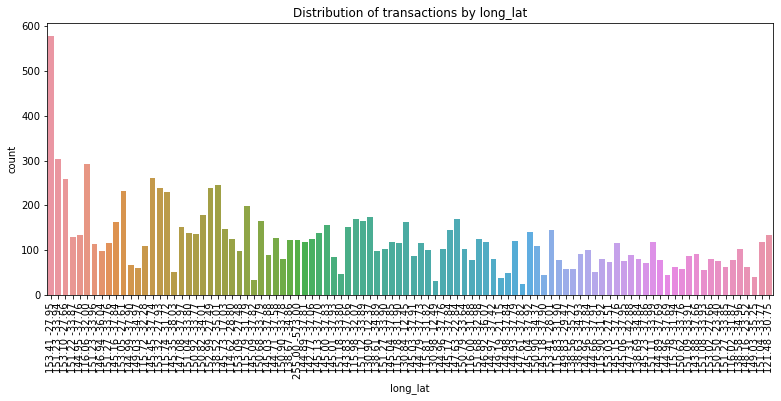

In [55]:
# Visualise distribution of transactions by long_lat
plt.figure(figsize=(13,5))
sns.countplot(data = data, x = 'long_lat')
plt.title('Distribution of transactions by long_lat')
plt.xticks(rotation = 90)
plt.show()

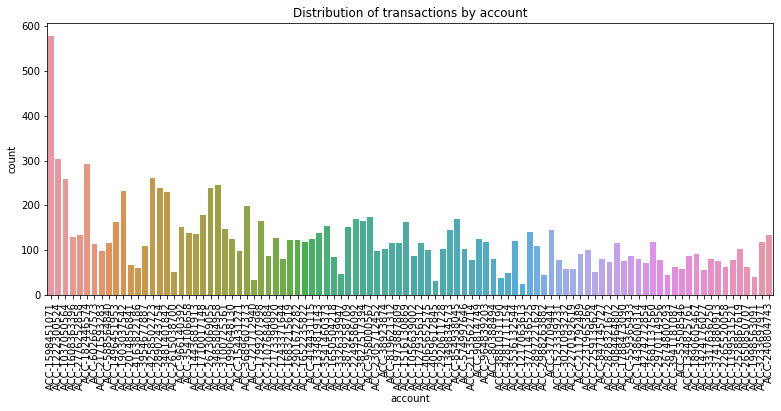

In [56]:
# Visualise distribution of transactions by account
plt.figure(figsize=(13,5))
sns.countplot(data = data, x = 'account')
plt.title('Distribution of transactions by account')
plt.xticks(rotation = 90)
plt.show()

The distribution of values in customer_id appears to match with those in account and long_lat columns. This indicates each customer has unique account and geographical location.

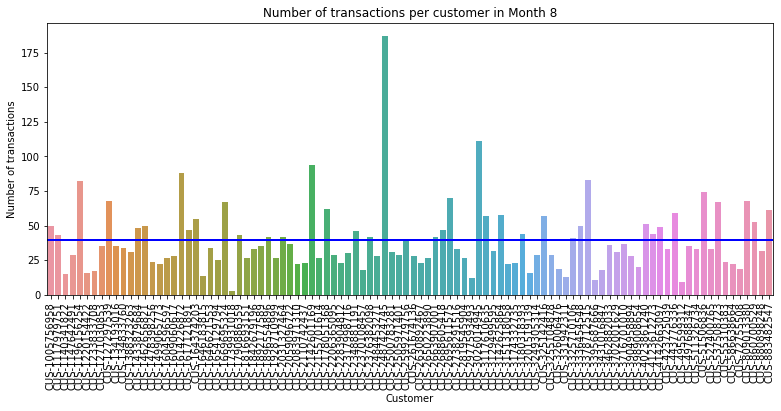

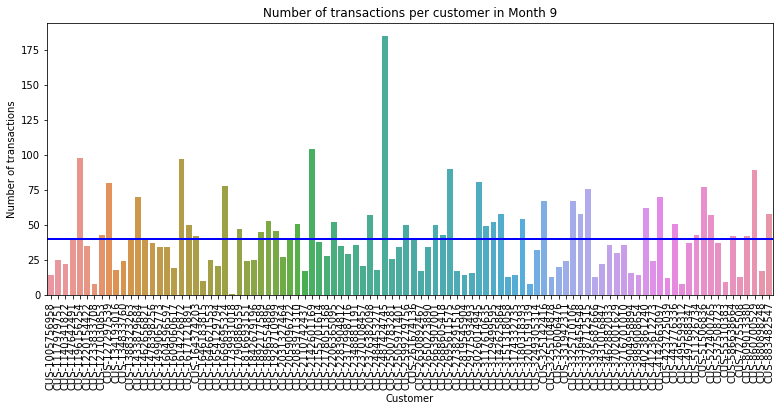

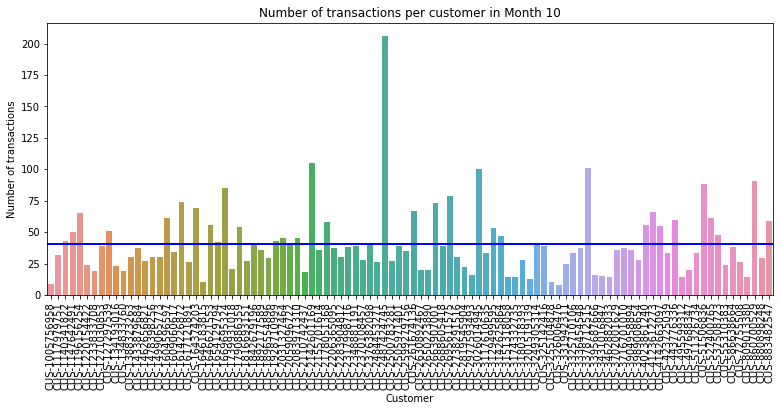

In [57]:
# Visualise number of transactions made by each customer in each month
for month in data.month.unique():
    per_customer_month = data[data.month == month].groupby('customer_id').transaction_id.count()
    by_customer_amount_series = pd.Series(per_customer_month)
    plt.figure(figsize=(13,5))
    sns.barplot(x = per_customer_month.index, y = per_customer_month)
    plt.title('Number of transactions per customer in Month %s'%month)
    plt.xlabel('Customer')
    plt.ylabel('Number of transactions')
    plt.xticks(rotation = 90)
    plt.axhline(y=np.mean(data[data.month == month].groupby('customer_id').transaction_id.count()), color='b', linewidth=2)
    plt.show()

In [58]:
per_customer_aug = np.array(data[data.month == 8].groupby('customer_id').transaction_id.count())

In [59]:
per_customer_sep = np.array(data[data.month == 9].groupby('customer_id').transaction_id.count())

In [60]:
per_customer_oct = np.array(data[data.month == 10].groupby('customer_id').transaction_id.count())

In [61]:
per_customer_change_sep = (per_customer_sep - per_customer_aug)/per_customer_aug*100

In [62]:
per_customer_change_oct = (per_customer_oct - per_customer_sep)/per_customer_sep*100

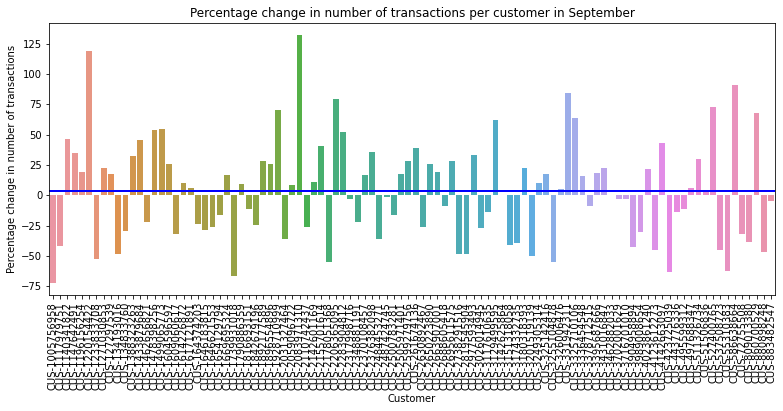

In [63]:
# Visualise percentage change in number of transactions per customer in September
per_customer_change_sep_series = pd.Series(per_customer_change_sep)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_sep_series.index, y=per_customer_change_sep_series)
plt.title('Percentage change in number of transactions per customer in September')
plt.xlabel('Customer')
plt.ylabel('Percentage change in number of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_sep), color='b', linewidth=2)
plt.show()

In [64]:
print('The percentage change in number of transactions made by each customer in September was %.0f%% on average.'%np.mean(per_customer_change_sep))

The percentage change in number of transactions made by each customer in September was 4% on average.


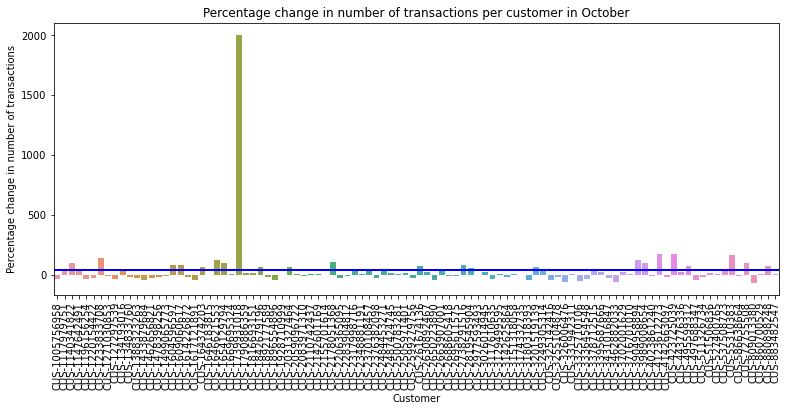

In [65]:
# Visualise percentage change in number of transactions per customer in October
per_customer_change_oct_series = pd.Series(per_customer_change_oct)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_oct_series.index, y=per_customer_change_oct_series)
plt.title('Percentage change in number of transactions per customer in October')
plt.xlabel('Customer')
plt.ylabel('Percentage change in number of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_oct), color='b', linewidth=2)
plt.show()

In [66]:
print('The percentage change in number of transactions made by each customer in October was %.0f%% on average.'%np.mean(per_customer_change_oct))

The percentage change in number of transactions made by each customer in October was 35% on average.


In [67]:
max_change = np.max(per_customer_change_oct)
max_change_customer = np.argmax(per_customer_change_oct)
print('The number of transactions made by each customer appears quite similar across the three months except for one customer %s, who had %.0f%% change in transactions in October.'%(customers[max_change_customer], max_change))

The number of transactions made by each customer appears quite similar across the three months except for one customer CUS-1739931018, who had 2000% change in transactions in October.


In [68]:
# View all transactions made by customer CUS-1739931018
data[data.customer_id == 'CUS-1739931018']

status  card_present_flag         account       long_lat  \
127    authorized                1.0  ACC-1217063613  147.61 -37.82   
761        posted                0.0  ACC-1217063613  147.61 -37.82   
792    authorized                1.0  ACC-1217063613  147.61 -37.82   
7309       posted                0.0  ACC-1217063613  147.61 -37.82   
8056       posted                0.0  ACC-1217063613  147.61 -37.82   
8407   authorized                1.0  ACC-1217063613  147.61 -37.82   
8430   authorized                1.0  ACC-1217063613  147.61 -37.82   
8441   authorized                1.0  ACC-1217063613  147.61 -37.82   
8475   authorized                1.0  ACC-1217063613  147.61 -37.82   
8618       posted                0.0  ACC-1217063613  147.61 -37.82   
8998       posted                0.0  ACC-1217063613  147.61 -37.82   
9477   authorized                0.0  ACC-1217063613  147.61 -37.82   
9548   authorized                1.0  ACC-1217063613  147.61 -37.82   
9594   authorized                1.0  ACC-1217063613  147.61 -37.82   
9746   authorized                1.0  ACC-1217063613  147.61 -37.82   
9769   authorized                1.0  ACC-1217063613  147.61 -37.82   
9780   authorized                0.0  ACC-1217063613  147.61 -37.82   
9941       posted                0.0  ACC-1217063613  147.61 -37.82   
10030      posted                0.0  ACC-1217063613  147.61 -37.82   
10631  authorized                0.0  ACC-1217063613  147.61 -37.82   
10885      posted                0.0  ACC-1217063613  147.61 -37.82   
10993      posted                0.0  ACC-1217063613  147.61 -37.82   
11344      posted                0.0  ACC-1217063613  147.61 -37.82   
11476  authorized                1.0  ACC-1217063613  147.61 -37.82   
11810      posted                0.0  ACC-1217063613  147.61 -37.82   

      txn_description                           merchant_id  balance  \
127         SALES-POS  92495e0a-61df-4c3d-9e2d-083ef2efed00    34.97   
761        INTER BANK                                   NaN    14.97   
792               POS  a39e17e7-8ca2-4a62-8ad7-6e7c841fc579     0.24   
7309       PAY/SALARY                                   NaN  4863.86   
8056       INTER BANK                                   NaN  4843.86   
8407              POS  66a0231a-2397-4bf1-ba73-5b8ec0b069b4  4828.48   
8430              POS  49c35605-04d0-4fec-993d-de6bce1e4871  4808.93   
8441        SALES-POS  b500a057-1d66-4769-b99a-b45163256045  4768.97   
8475        SALES-POS  e1f6407e-16d6-4779-99b5-52ee31a6dad8  4756.99   
8618          PAYMENT                                   NaN  4591.99   
8998       INTER BANK                                   NaN  4571.99   
9477              POS  c585ab9b-68e1-41e0-8033-1caf773e748f  4555.25   
9548        SALES-POS  5a214e57-7e9b-4ec0-942c-fb2d891eb607  4548.19   
9594        SALES-POS  71608821-0caf-49b2-a851-1591d212ac27  4533.69   
9746              POS  6a6c7c64-28f0-4286-8cd0-bffeaa33972c  4510.78   
9769              POS  f75d1ba6-c916-4906-92f6-d8beb6e19339  4429.37   
9780        SALES-POS  d5696f32-4a46-47f7-83af-ae638ffeb05f  4418.31   
9941       INTER BANK                                   NaN  4398.31   
10030      INTER BANK                                   NaN  4243.31   
10631             POS  c9a1d8c2-3d58-4bf4-a2a9-bb3671358c2c  4235.15   
10885      INTER BANK                                   NaN  4215.15   
10993         PAYMENT                                   NaN  4042.15   
11344      PAY/SALARY                                   NaN  8905.77   
11476             POS  3ae083e7-fb3f-48eb-b2d6-3254c345eaf5  8864.02   
11810      INTER BANK                                   NaN  8844.02   

            date gender  age  ... merchant_state  \
127   2018-08-01      F   27  ...            VIC   
761   2018-08-06      F   27  ...            NaN   
792   2018-08-07      F   27  ...            VIC   
7309  2018-09-26      F   27  ...            NaN   
8056  2018-10-01      F   27  .

The customer CUS-1739931018 had only one transaction in September but 20 transactions in October.

In [69]:
print('Excluding this customer, the percentage change in number of transactions in October per customer was %.0f%%.'%np.mean(per_customer_change_oct[per_customer_change_oct != max_change]))

Excluding this customer, the percentage change in number of transactions in October per customer was 15%.


### Amount of transactions per customer

In [70]:
by_customer_amount = data.groupby('customer_id').amount.sum()

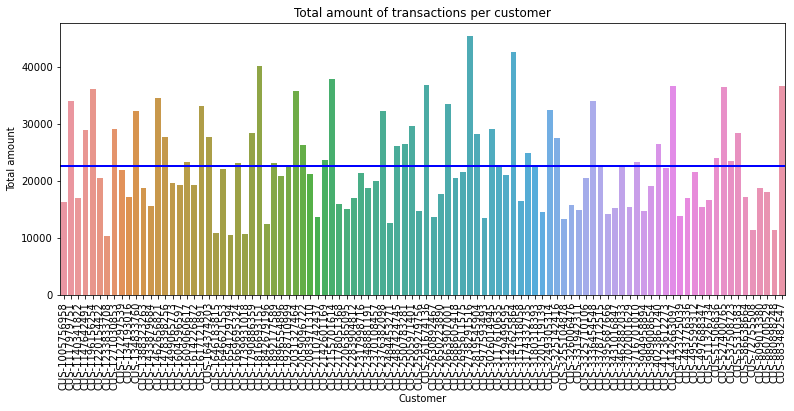

In [71]:
# Visualise total amount of transactions per customer
by_customer_amount_series = pd.Series(by_customer_amount)
plt.figure(figsize=(13,5))
sns.barplot(x = by_customer_amount_series.index, y = by_customer_amount_series)
plt.title('Total amount of transactions per customer')
plt.xlabel('Customer')
plt.ylabel('Total amount')
plt.xticks(rotation = 90)
plt.axhline(y=np.mean(data.groupby('customer_id').amount.sum()), color='b', linewidth=2)
plt.show()

In [72]:
print('On average, each customer makes a total amount of %.0f AUD in the transactions.'%np.mean(data.groupby('customer_id').amount.sum()))

On average, each customer makes a total amount of 22633 AUD in the transactions.


In [73]:
per_customer_amount_aug = np.array(data[data.month == 8].groupby('customer_id').amount.sum())

In [74]:
per_customer_amount_sep = np.array(data[data.month == 9].groupby('customer_id').amount.sum())

In [75]:
per_customer_amount_oct = np.array(data[data.month == 10].groupby('customer_id').amount.sum())

In [76]:
per_customer_change_amount_sep = (per_customer_amount_sep - per_customer_amount_aug)/per_customer_amount_aug*100

In [77]:
per_customer_change_amount_oct = (per_customer_amount_oct - per_customer_amount_sep)/per_customer_amount_sep*100

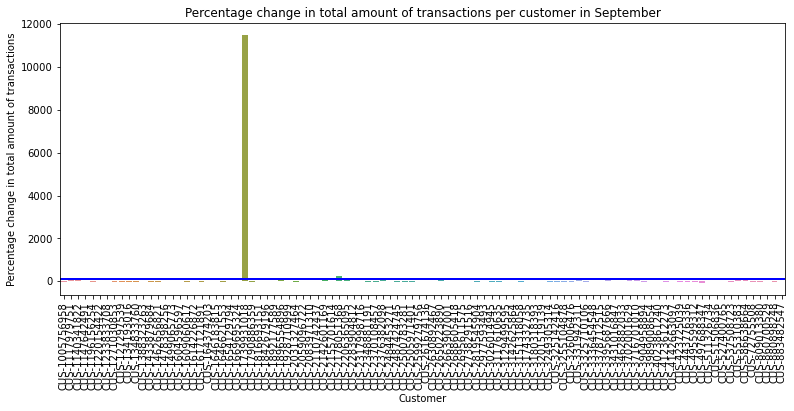

In [78]:
# Visualise percentage change in total amount of transactions per customer in September
per_customer_change_amount_sep_series = pd.Series(per_customer_change_amount_sep)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_amount_sep_series.index, y=per_customer_change_amount_sep_series)
plt.title('Percentage change in total amount of transactions per customer in September')
plt.xlabel('Customer')
plt.ylabel('Percentage change in total amount of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_amount_sep), color='b', linewidth=2)
plt.show()

In [79]:
max_change_amount = np.max(per_customer_change_amount_sep)
max_change_amount_customer = np.argmax(per_customer_change_amount_sep)
print('The percentage change in total amount of transactions made by each customer appears negligible in September except for one customer %s, who had %.0f%% change in the amount.'%(customers[max_change_amount_customer], max_change_amount))

The percentage change in total amount of transactions made by each customer appears negligible in September except for one customer CUS-1739931018, who had 11475% change in the amount.


This same customer was identified to have increased from 1 to 20 transactions in October.

In [80]:
print('Excluding this customer, the percentage change in amount of transactions per customer in September was %.0f%%.'%np.mean(per_customer_change_amount_sep[per_customer_change_amount_sep != max_change_amount]))

Excluding this customer, the percentage change in amount of transactions per customer in September was 4%.


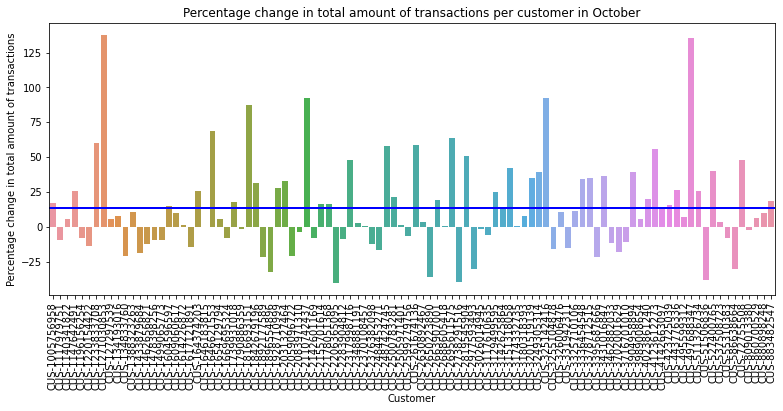

In [81]:
# Visualise percentage change in total amount of transactions per customer in October
per_customer_change_amount_oct_series = pd.Series(per_customer_change_amount_oct)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_amount_oct_series.index, y=per_customer_change_amount_oct_series)
plt.title('Percentage change in total amount of transactions per customer in October')
plt.xlabel('Customer')
plt.ylabel('Percentage change in total amount of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_amount_oct), color='b', linewidth=2)
plt.show()

In [82]:
print('The percentage change in total amount of transactions made by each customer in October was %.0f%% on average.'%np.mean(per_customer_change_amount_oct))

The percentage change in total amount of transactions made by each customer in October was 13% on average.


### Location of each customer

In [83]:
# Separate long_lat into two columns longitude and lattitude
long_lat_series = data['long_lat'].str.split(' ')
data['longitude'] = long_lat_series.str.get(0)
data['latitude'] = long_lat_series.str.get(1)

In [84]:
# Check that no customer has more than one longitude
num_longitude_per_customer = data.groupby('customer_id').longitude.nunique()
num_longitude_per_customer[num_longitude_per_customer > 1].index

Index([], dtype='object', name='customer_id')

In [85]:
# Check that no customer has more than one latitude
num_latitude_per_customer = data.groupby('customer_id').latitude.nunique()
num_latitude_per_customer[num_latitude_per_customer > 1].index

Index([], dtype='object', name='customer_id')

In [86]:
# Extract customer_id, longitude and latitude
loc_data = data[['customer_id', 'longitude','latitude']]

In [87]:
loc_data.drop_duplicates().reset_index()

index     customer_id longitude latitude
0       0  CUS-2487424745    153.41   -27.95
1       2  CUS-2142601169    151.23   -33.94
2       3  CUS-1614226872    153.10   -27.66
3       5  CUS-2688605418    151.22   -33.87
4       6  CUS-4123612273    144.95   -37.76
..    ...             ...       ...      ...
95    357  CUS-2505971401    138.58   -34.96
96    386  CUS-2819545904    148.16   -23.52
97    450  CUS-3395687666    149.03   -35.25
98    702  CUS-1147642491    151.04   -33.77
99    706   CUS-261674136    121.48   -30.75

[100 rows x 4 columns]

In [88]:
# Define bounding box
BBox = ((loc_data.longitude.min(), loc_data.longitude.max(), loc_data.latitude.min(), loc_data.latitude.max()))
BBox

('114.62', '255.00', '-12.37', '-573.00')

In [89]:
# Plot customer's locations on map

fig = go.Figure(data=go.Scattergeo(
        lon = loc_data['longitude'],
        lat = loc_data['latitude'],
        mode = 'markers'))

fig.update_layout(
        title = 'Geographical distribution of customers',
        geo_scope='world')
fig.show()

Most customers are located on the east coast of Australia.